## import dataset:

In [26]:
import pandas as pd
import pickle
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_pickle("datasets/dataset_sql_cleaned.pkl")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   titre           3276 non-null   object  
 1   budget          3276 non-null   int64   
 2   duree           3276 non-null   int64   
 3   entrees_fr      3276 non-null   int64   
 4   franchise       3276 non-null   category
 5   genres          3276 non-null   category
 6   pegi_fr         2872 non-null   category
 7   pegi_usa        2470 non-null   category
 8   entrees_usa     2624 non-null   float64 
 9   salles_fr       3276 non-null   int64   
 10  studio          3251 non-null   object  
 11  estimation      0 non-null      object  
 12  is_compositeur  3276 non-null   category
 13  annee           3276 non-null   int64   
 14  origine         3276 non-null   category
dtypes: category(6), float64(1), int64(5), object(3)
memory usage: 249.9+ KB


## premiere analyse:

                                        titre    budget  duree  entrees_fr  \
0  l'age de glace 3 - le temps des dinosaures  90000000     87     2403734   
1                                l'ile de nim  37000000     95      243392   
2         twilight - chapitre 1 : fascination  37000000    120      755835   
3                                   #jesuislà  11378260     98      112363   
4                                #pire soirée  20000000    101       66666   

  franchise         genres         pegi_fr pegi_usa  entrees_usa  salles_fr  \
0         1      animation   Tous publics        PG   41690382.0        783   
1         0  film familial   Tous publics        PG   13210579.0        399   
2         1        fantasy   Tous publics        PG   69637740.0        455   
3         0        comédie   Tous publics       NaN          NaN        387   
4         0        comédie   Tous publics         R    8004283.0        145   

             studio estimation is_compositeur  annee    

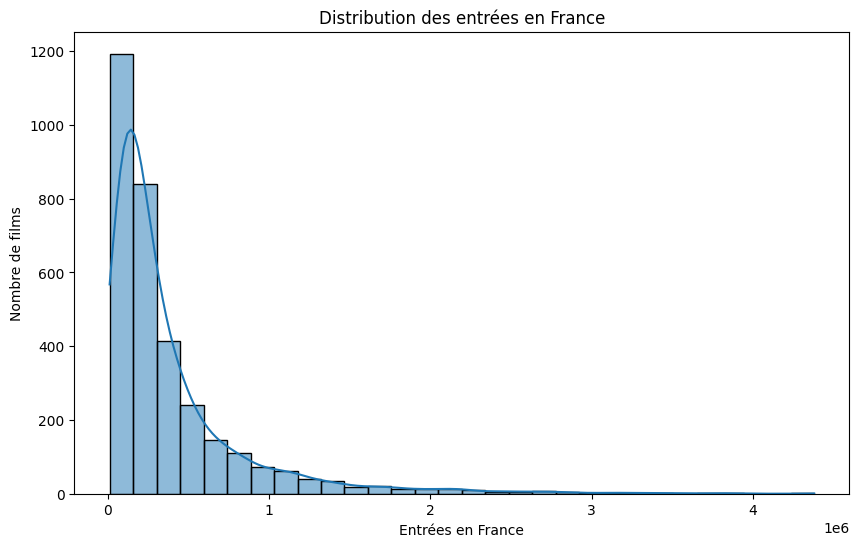

In [28]:
# Afficher les premières lignes du dataset
print(data.head())

# Informations sur les types de données et les valeurs manquantes
print(data.info())

# Statistiques descriptives
print(data.describe())

# Distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.histplot(data['entrees_fr'], bins=30, kde=True)
plt.title('Distribution des entrées en France')
plt.xlabel('Entrées en France')
plt.ylabel('Nombre de films')
plt.show()



## Relation entre differentes feature et le nombre d'entrée en France

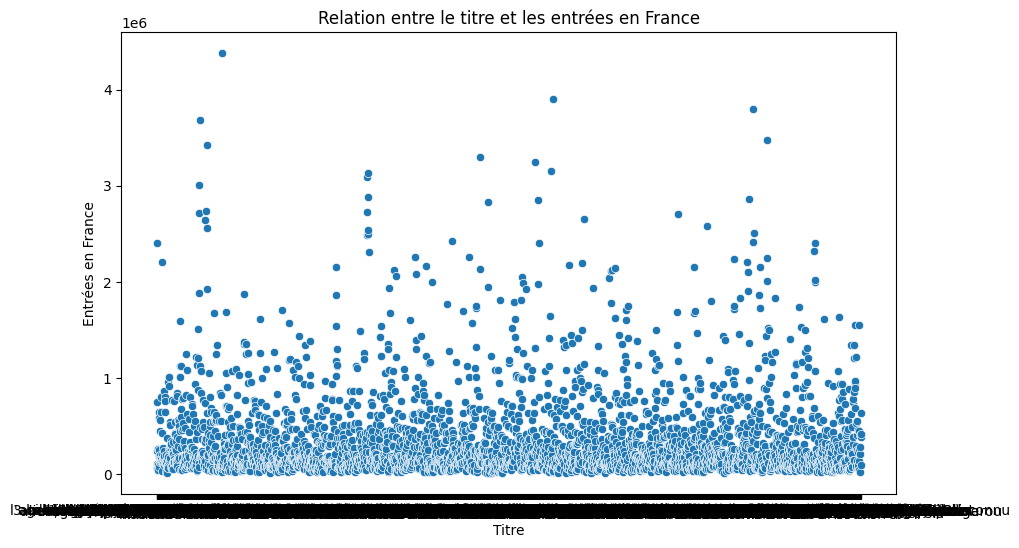

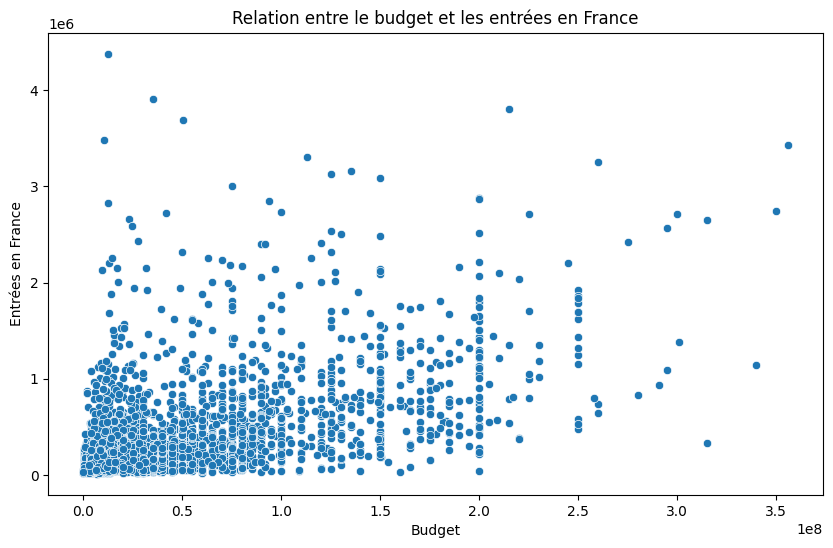

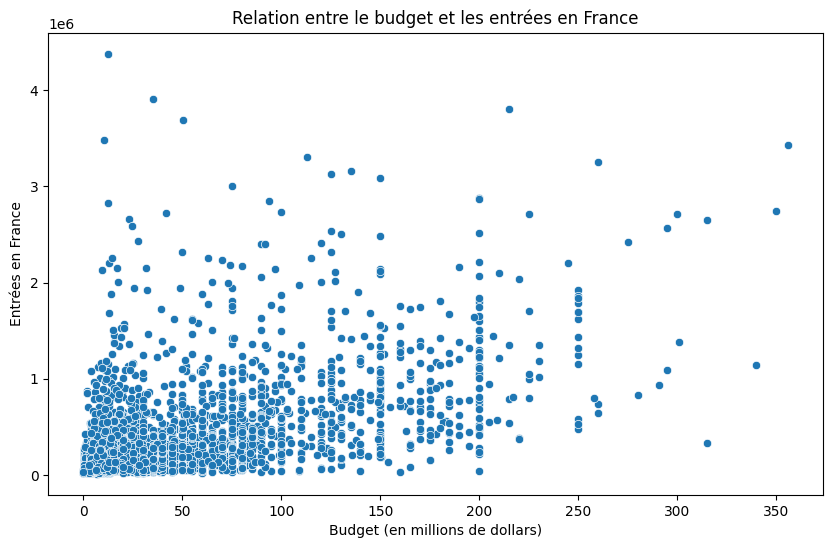

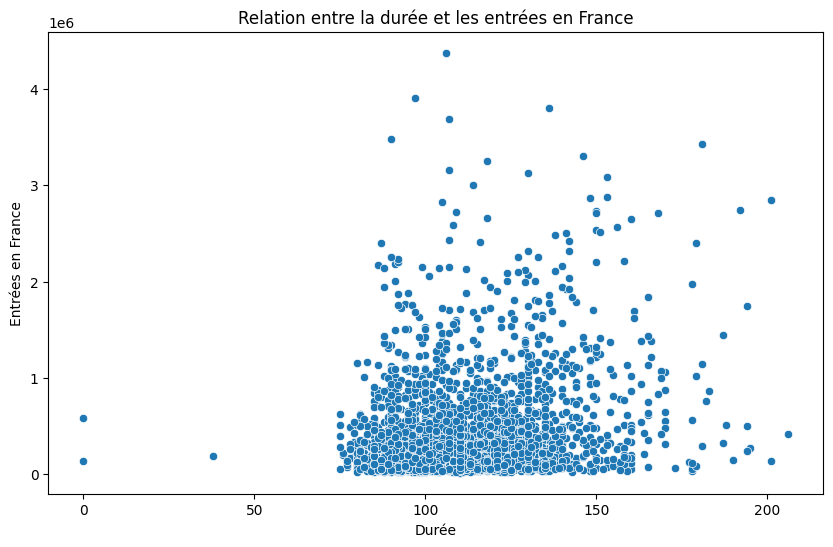

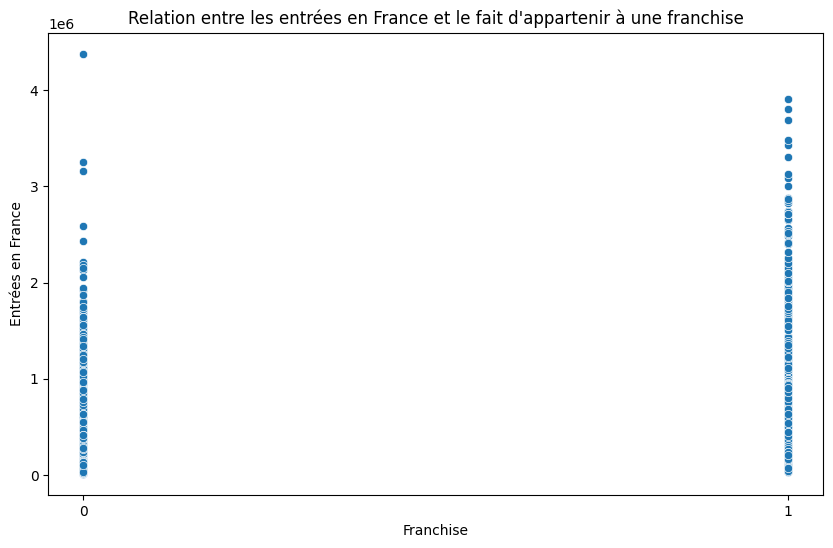

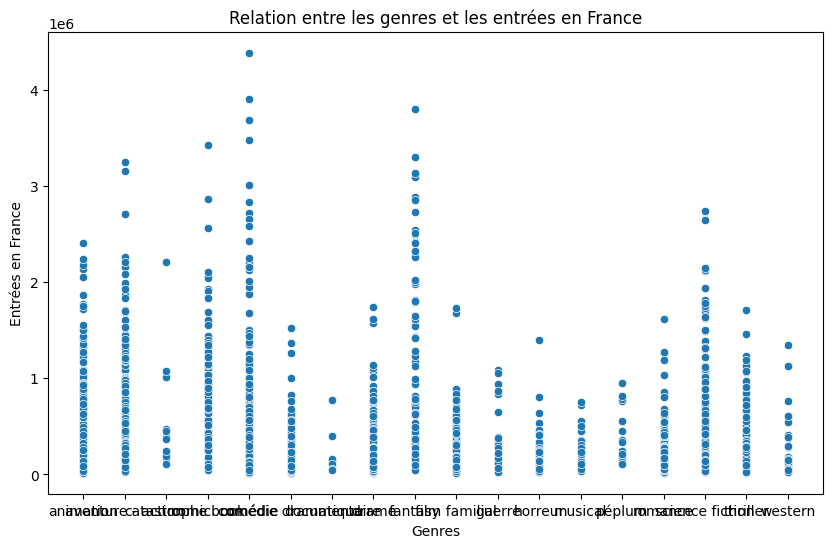

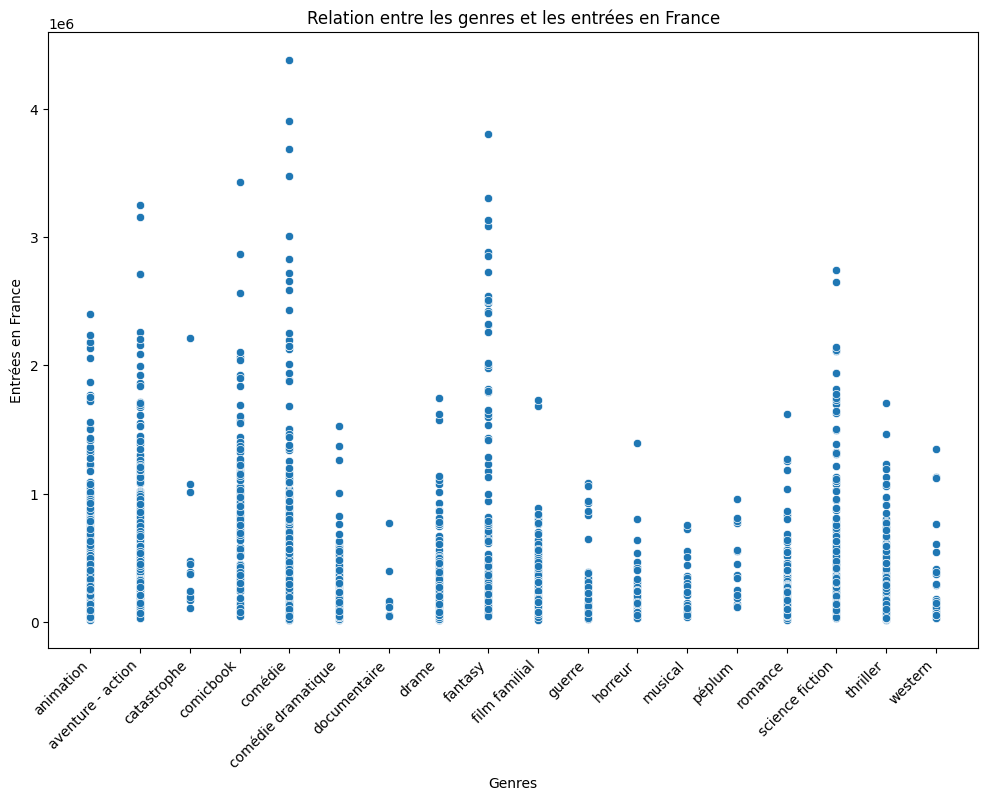

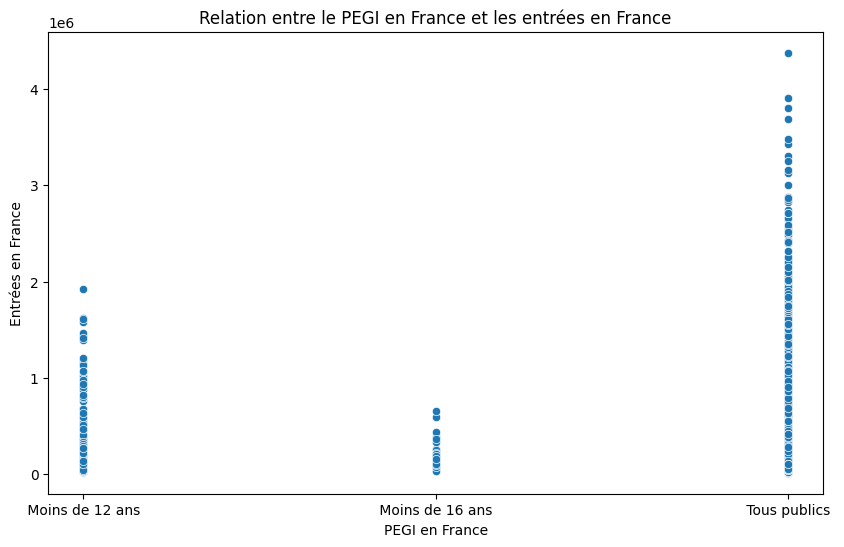

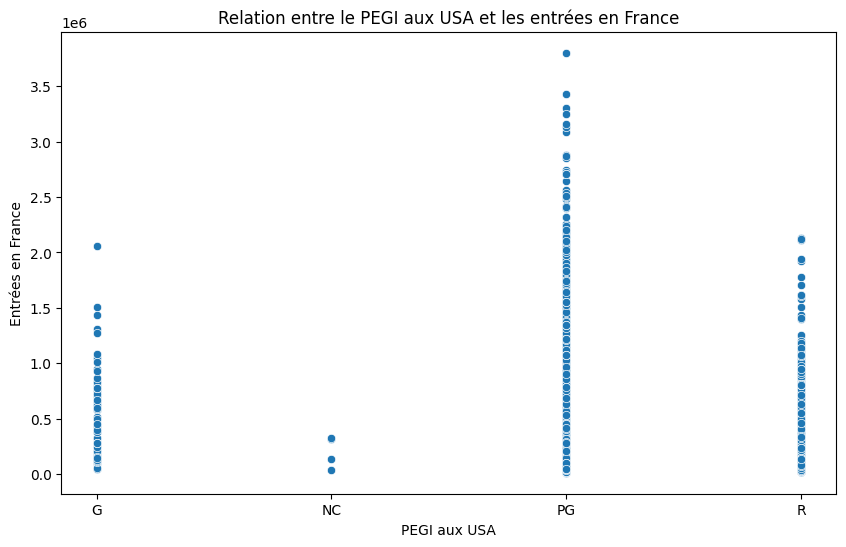

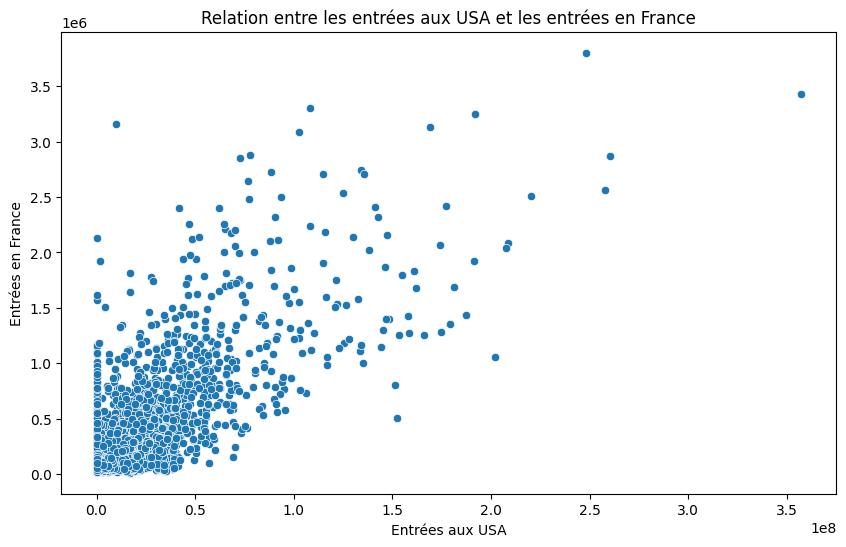

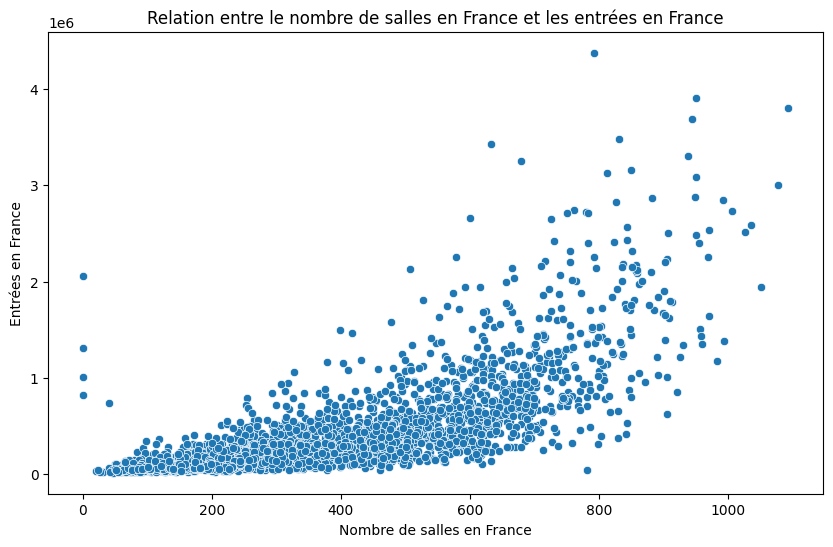

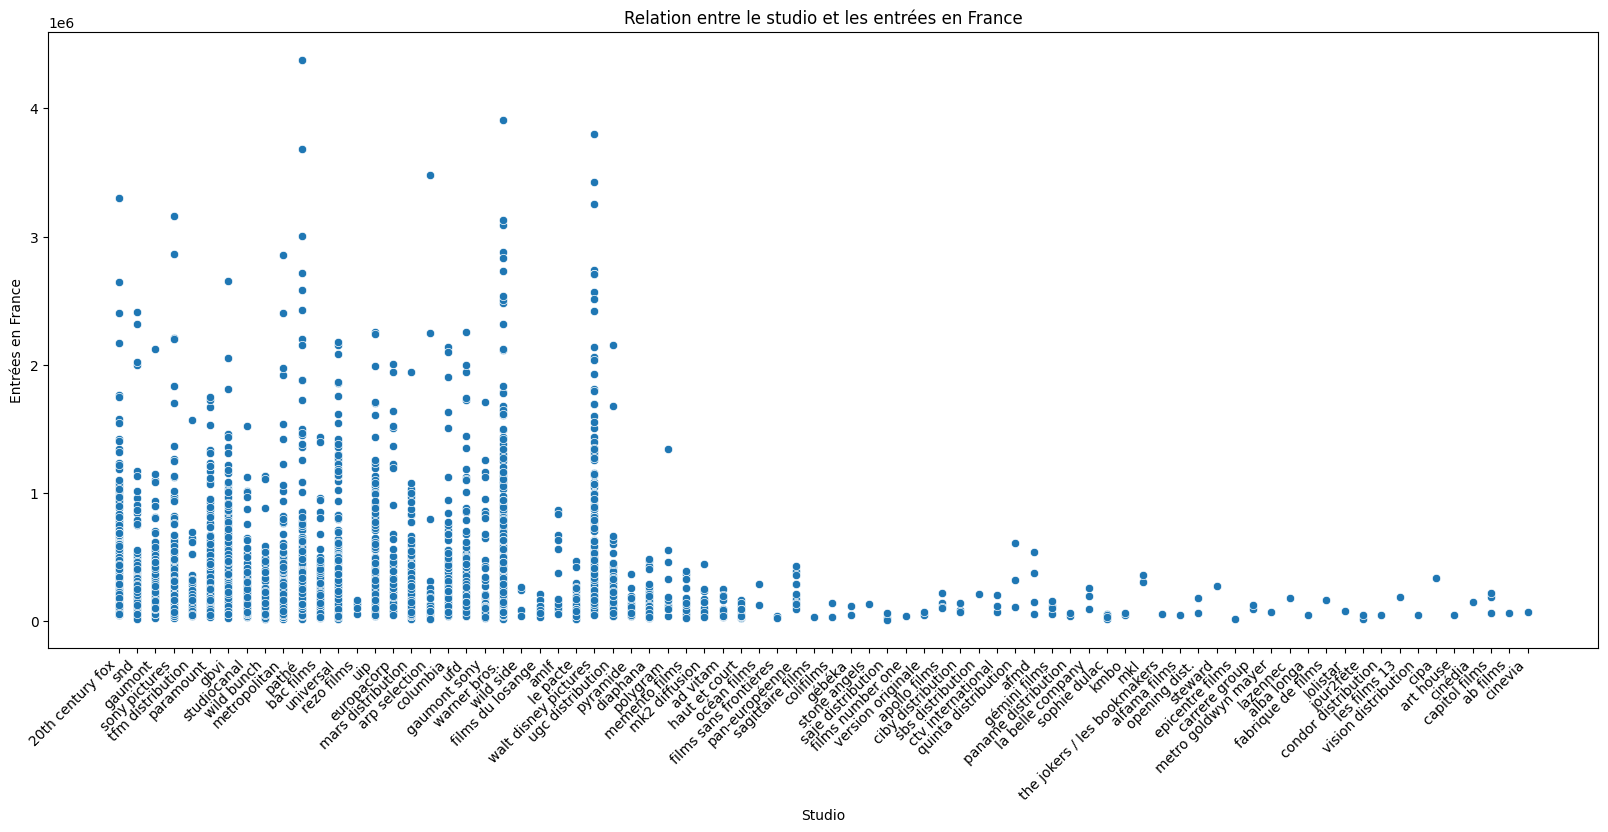

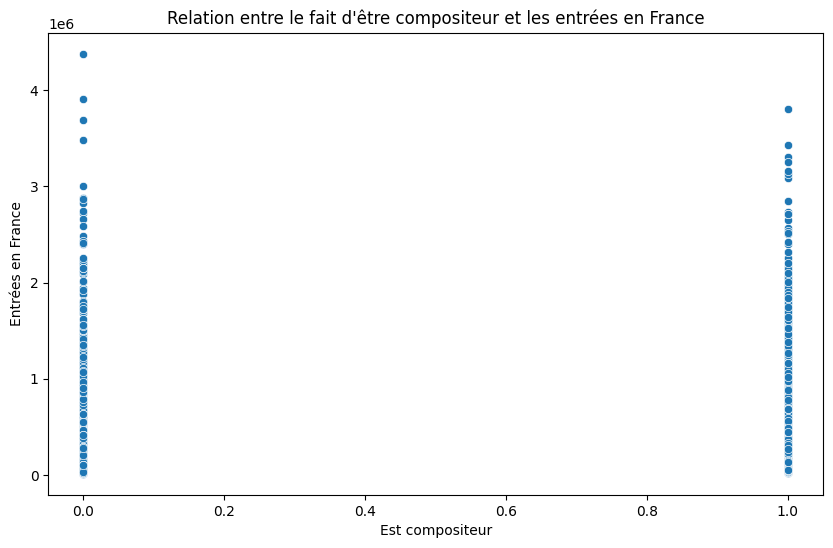

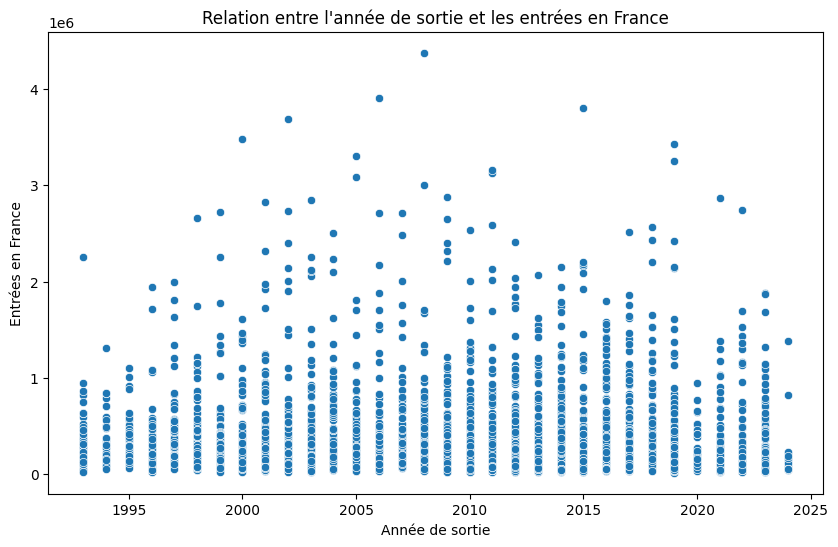

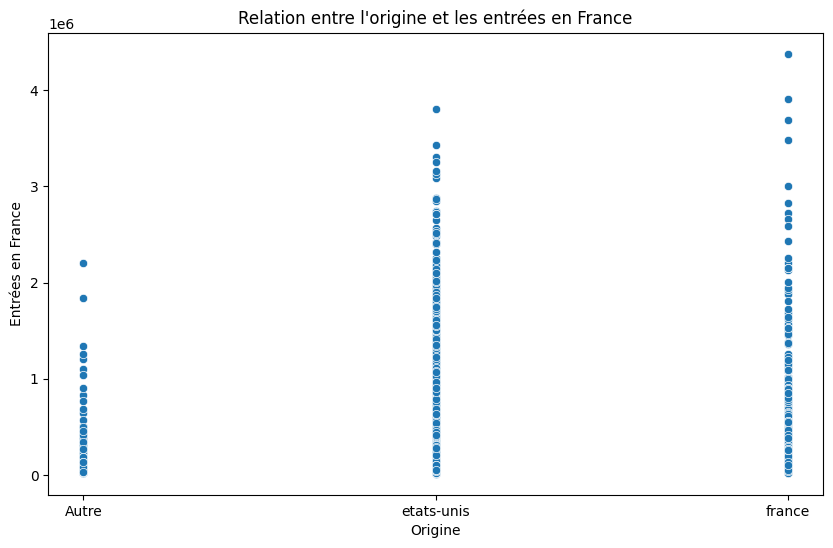

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relation entre le titre et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='titre', y='entrees_fr', data=data)
plt.title('Relation entre le titre et les entrées en France')
plt.xlabel('Titre')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre le budget et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='entrees_fr', data=data)
plt.title('Relation entre le budget et les entrées en France')
plt.xlabel('Budget')
plt.ylabel('Entrées en France')
plt.show()

# Créer une nouvelle colonne 'budget_millions' en divisant le budget par un million
data['budget_millions'] = data['budget'] / 1000000  # Convertir le budget en millions
# Relation entre le budget (en millions de dollars) et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget_millions', y='entrees_fr', data=data)
plt.title('Relation entre le budget et les entrées en France')
plt.xlabel('Budget (en millions de dollars)')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre la durée et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duree', y='entrees_fr', data=data)
plt.title('Relation entre la durée et les entrées en France')
plt.xlabel('Durée')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre les entrées en France et le fait d'appartenir à une franchise
plt.figure(figsize=(10, 6))
sns.scatterplot(x='franchise', y='entrees_fr', data=data)
plt.title('Relation entre les entrées en France et le fait d\'appartenir à une franchise')
plt.xlabel('Franchise')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre les genres et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='genres', y='entrees_fr', data=data)
plt.title('Relation entre les genres et les entrées en France')
plt.xlabel('Genres')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre les genres et les entrées en France
plt.figure(figsize=(12, 8))
sns.scatterplot(x='genres', y='entrees_fr', data=data)
# Rotation des étiquettes des genres
plt.xticks(rotation=45, ha='right')  # Rotation de 45 degrés avec alignement à droite
plt.title('Relation entre les genres et les entrées en France')
plt.xlabel('Genres')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre le PEGI en France et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pegi_fr', y='entrees_fr', data=data)
plt.title('Relation entre le PEGI en France et les entrées en France')
plt.xlabel('PEGI en France')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre le PEGI aux USA et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pegi_usa', y='entrees_fr', data=data)
plt.title('Relation entre le PEGI aux USA et les entrées en France')
plt.xlabel('PEGI aux USA')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre les entrées aux USA et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='entrees_usa', y='entrees_fr', data=data)
plt.title('Relation entre les entrées aux USA et les entrées en France')
plt.xlabel('Entrées aux USA')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre le nombre de salles en France et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salles_fr', y='entrees_fr', data=data)
plt.title('Relation entre le nombre de salles en France et les entrées en France')
plt.xlabel('Nombre de salles en France')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre le studio et les entrées en France
# Relation entre les genres et les entrées en France
plt.figure(figsize=(20, 8))
sns.scatterplot(x='studio', y='entrees_fr', data=data)
# Rotation des étiquettes des genres
plt.xticks(rotation=45, ha='right')  # Rotation de 45 degrés avec alignement à droite
plt.title('Relation entre le studio et les entrées en France')
plt.xlabel('Studio')
plt.ylabel('Entrées en France')
plt.show()


# Relation entre le fait d'être compositeur et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='is_compositeur', y='entrees_fr', data=data)
plt.title('Relation entre le fait d\'être compositeur et les entrées en France')
plt.xlabel('Est compositeur')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre l'année de sortie et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annee', y='entrees_fr', data=data)
plt.title('Relation entre l\'année de sortie et les entrées en France')
plt.xlabel('Année de sortie')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre l'origine et les entrées en France
plt.figure(figsize=(10, 6))
sns.scatterplot(x='origine', y='entrees_fr', data=data)
plt.title('Relation entre l\'origine et les entrées en France')
plt.xlabel('Origine')
plt.ylabel('Entrées en France')
plt.show()


## Analyses de distribution:

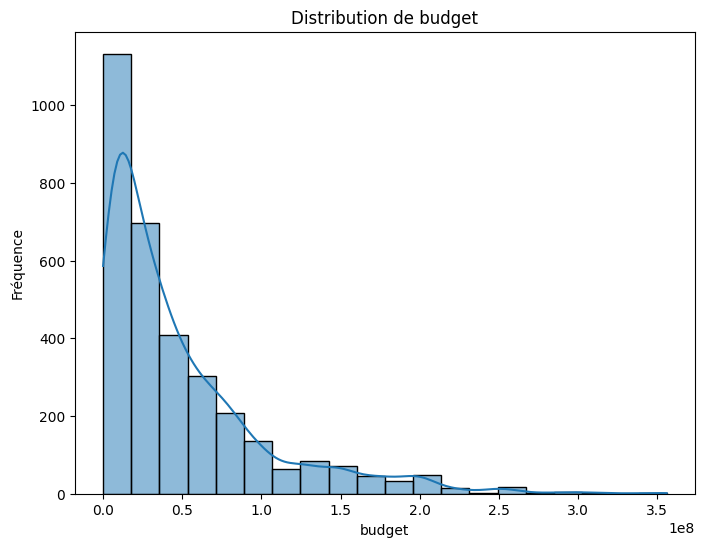

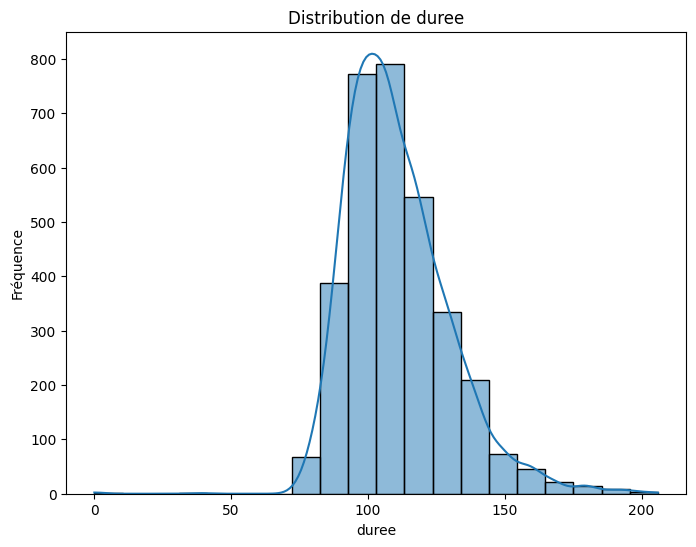

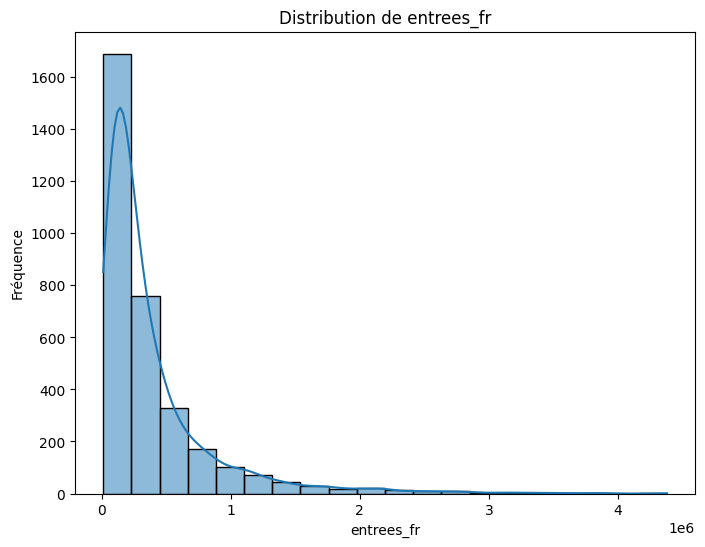

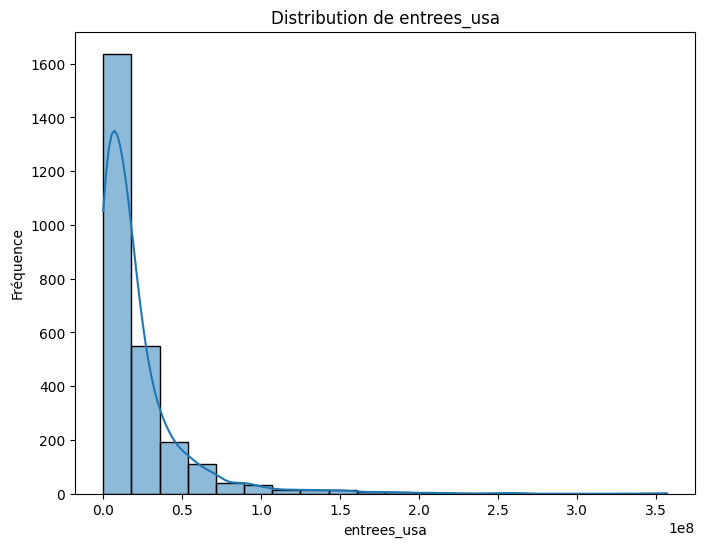

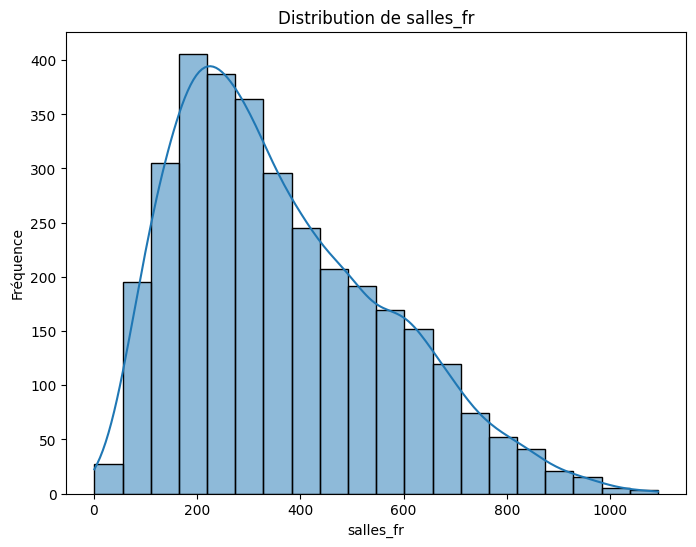

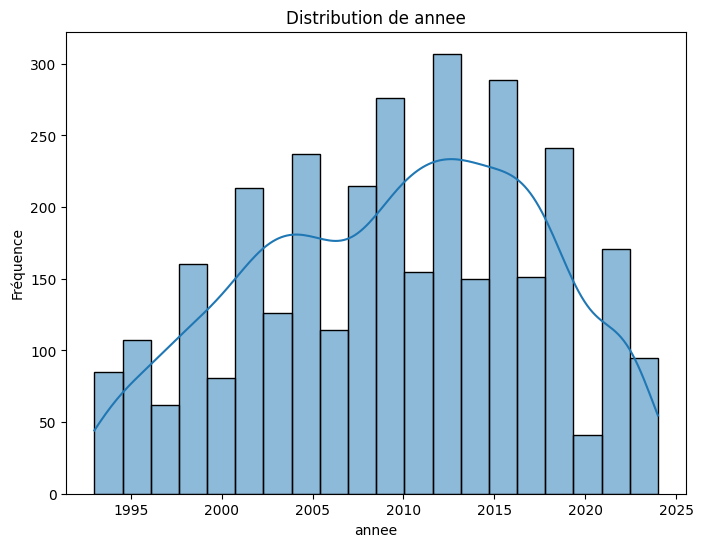

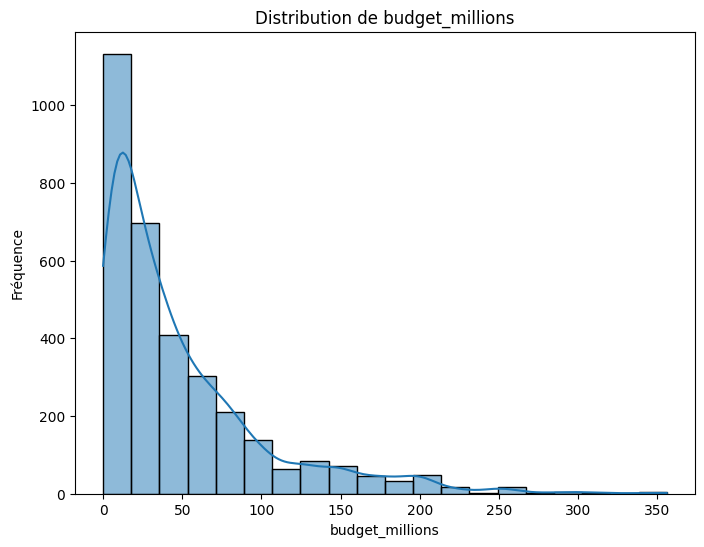

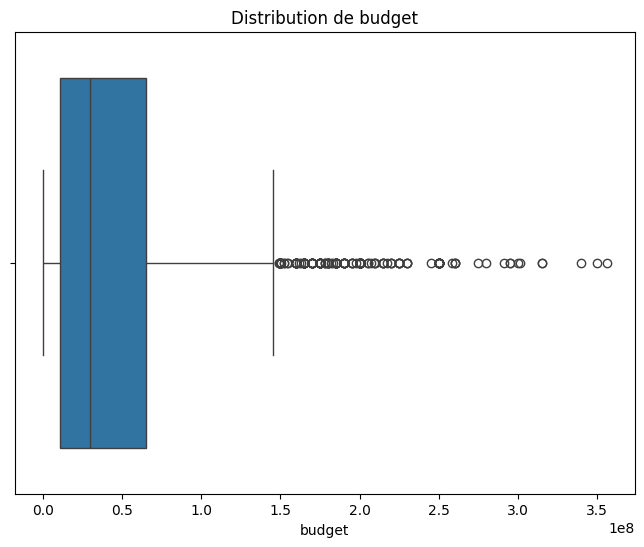

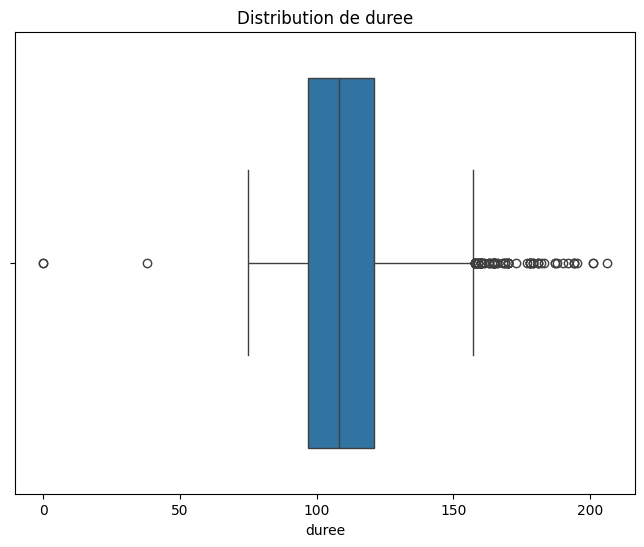

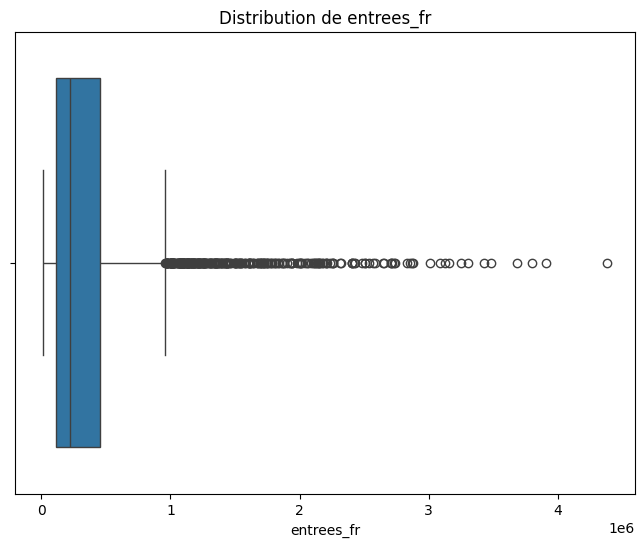

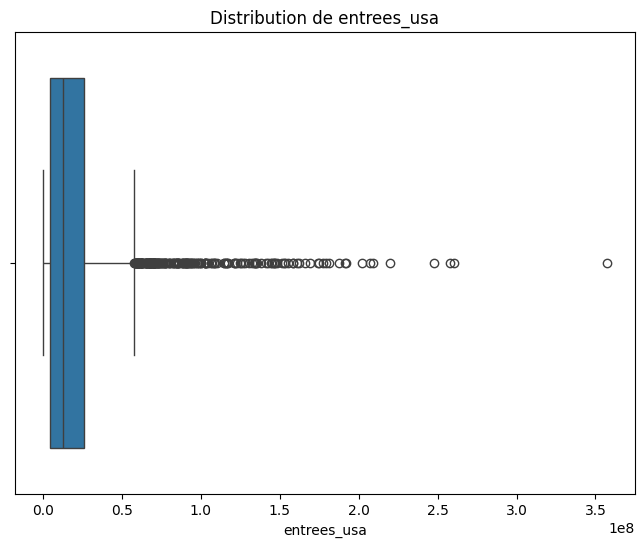

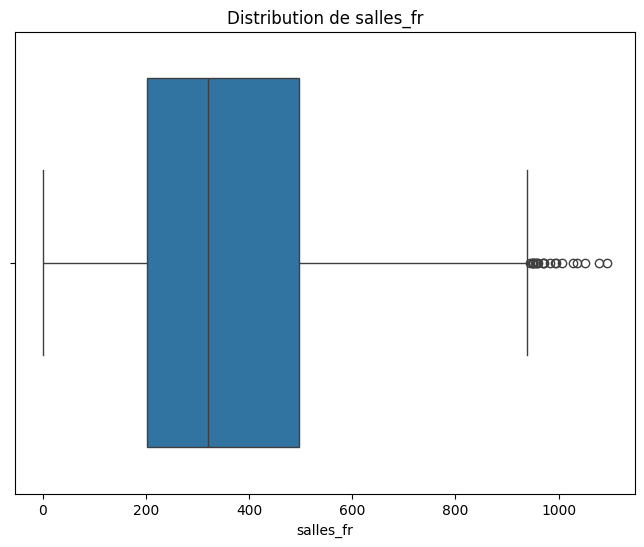

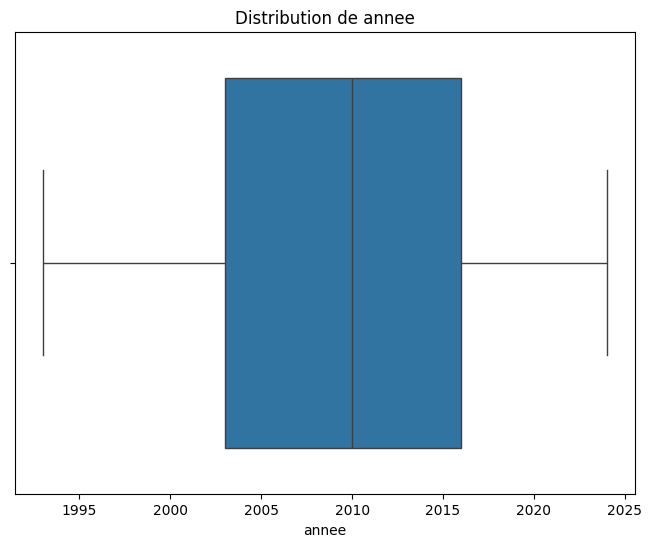

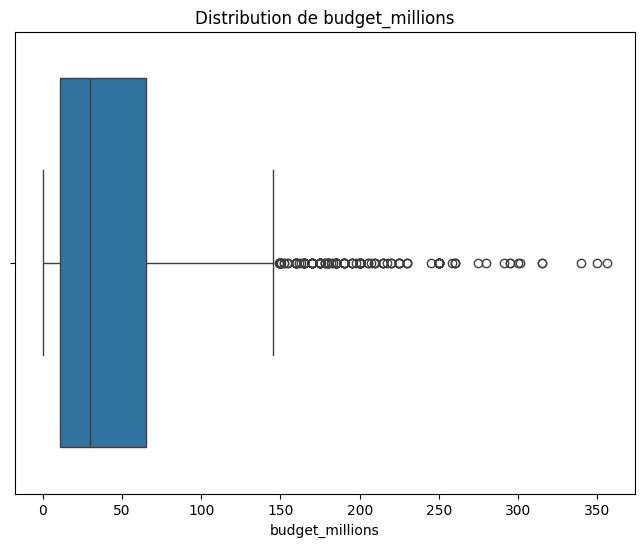

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_10435/569334380.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


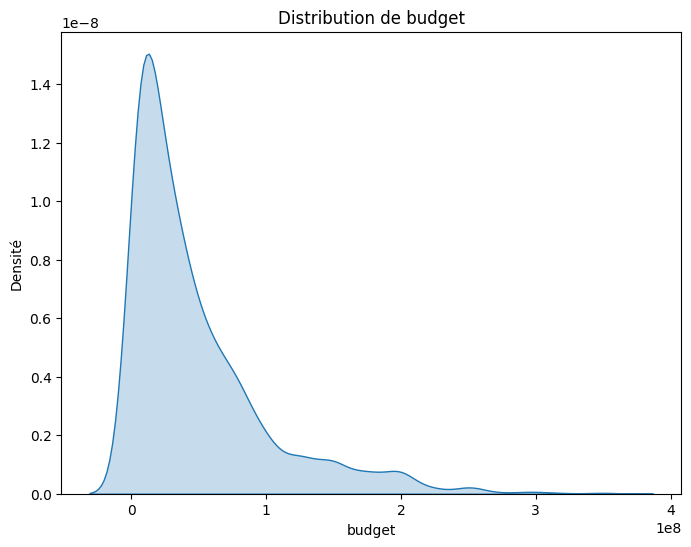

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_10435/569334380.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


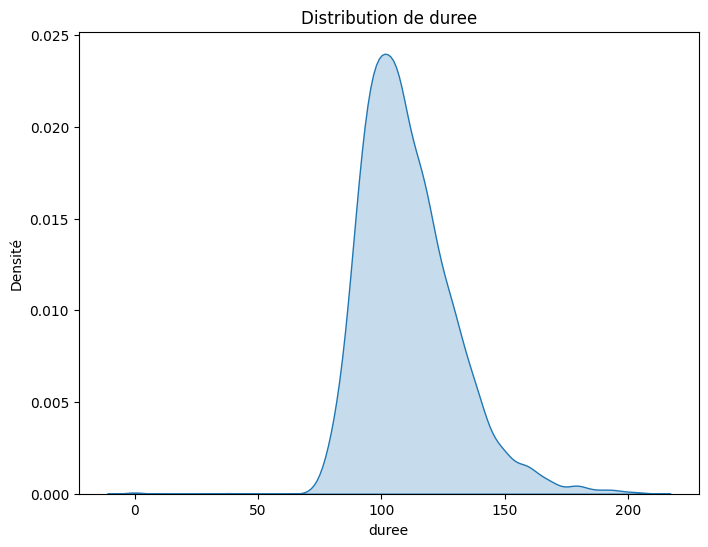

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_10435/569334380.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


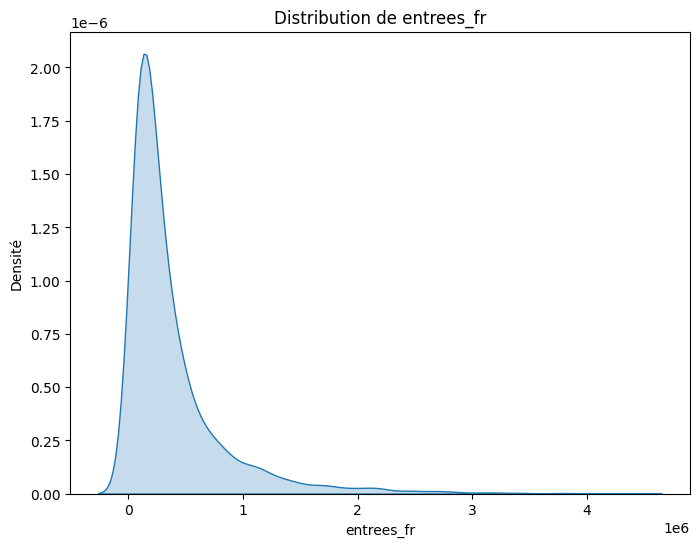

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_10435/569334380.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


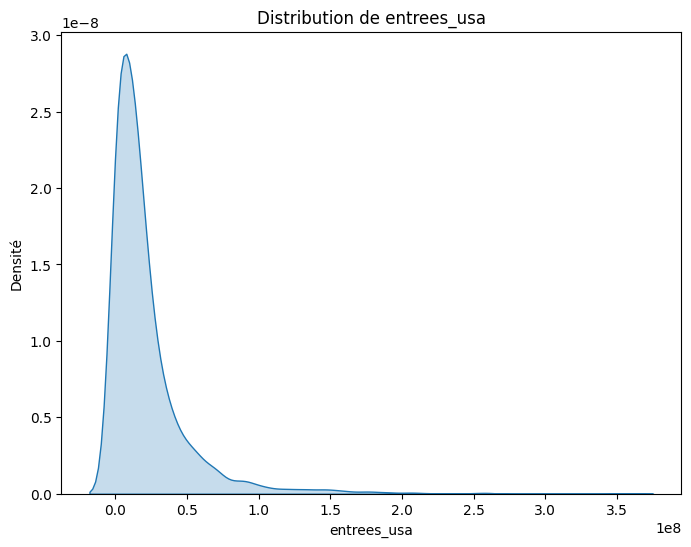

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_10435/569334380.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


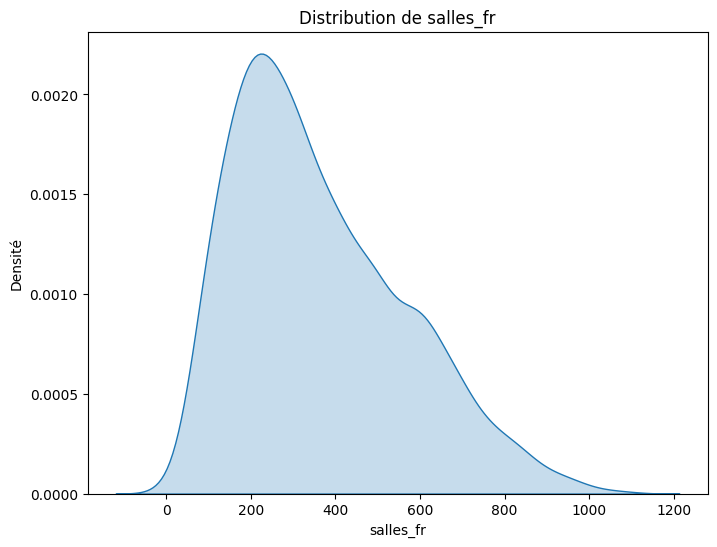

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_10435/569334380.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


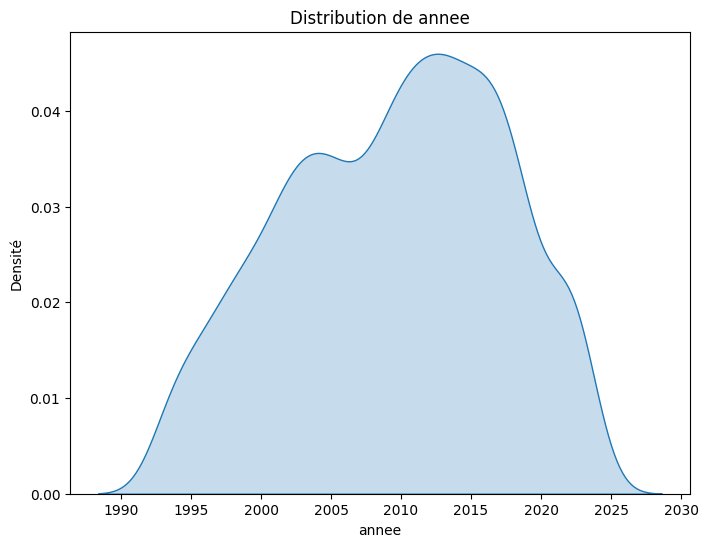

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_10435/569334380.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


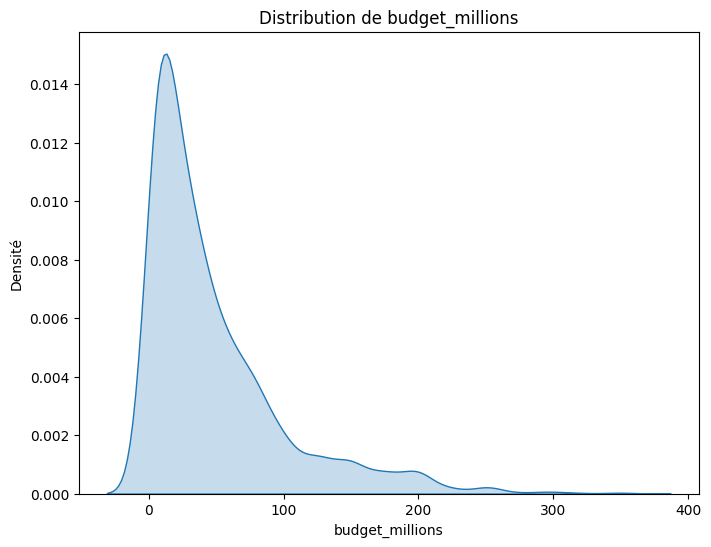

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques pour l'analyse de la distribution
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Tracer des histogrammes pour chaque colonne numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

# Tracer des diagrammes en boîte pour chaque colonne numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.show()

# Tracer des graphiques de densité pour chaque colonne numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[column], shade=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Densité')
    plt.show()


## Segmenter les données & clustering (K-Means)

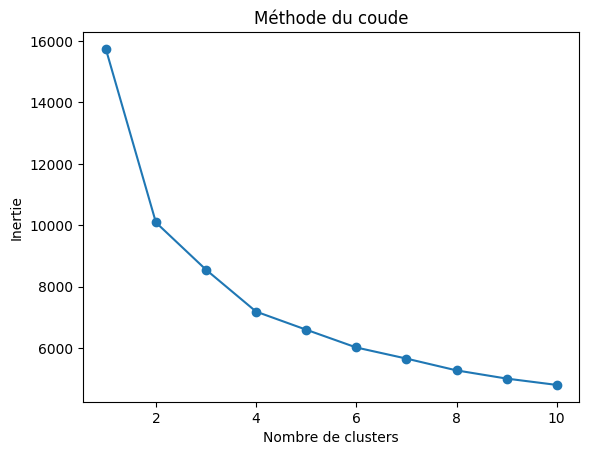

         budget                                                       \
          count          mean           std         min          25%   
cluster                                                                
0        1789.0  3.131417e+07  2.155512e+07    800000.0   13000000.0   
1         173.0  1.753264e+08  6.226633e+07  50000000.0  130000000.0   
2         662.0  9.874337e+07  4.574116e+07   3999990.0   69250000.0   

                                                 duree              ...  \
                 50%          75%          max   count        mean  ...   
cluster                                                             ...   
0         28000000.0   45000000.0  140000000.0  1789.0  109.624930  ...   
1        175000000.0  200000000.0  356000000.0   173.0  134.450867  ...   
2         90000000.0  125000000.0  315000000.0   662.0  116.240181  ...   

          annee         entrees_usa                                         \
            75%     max       count   

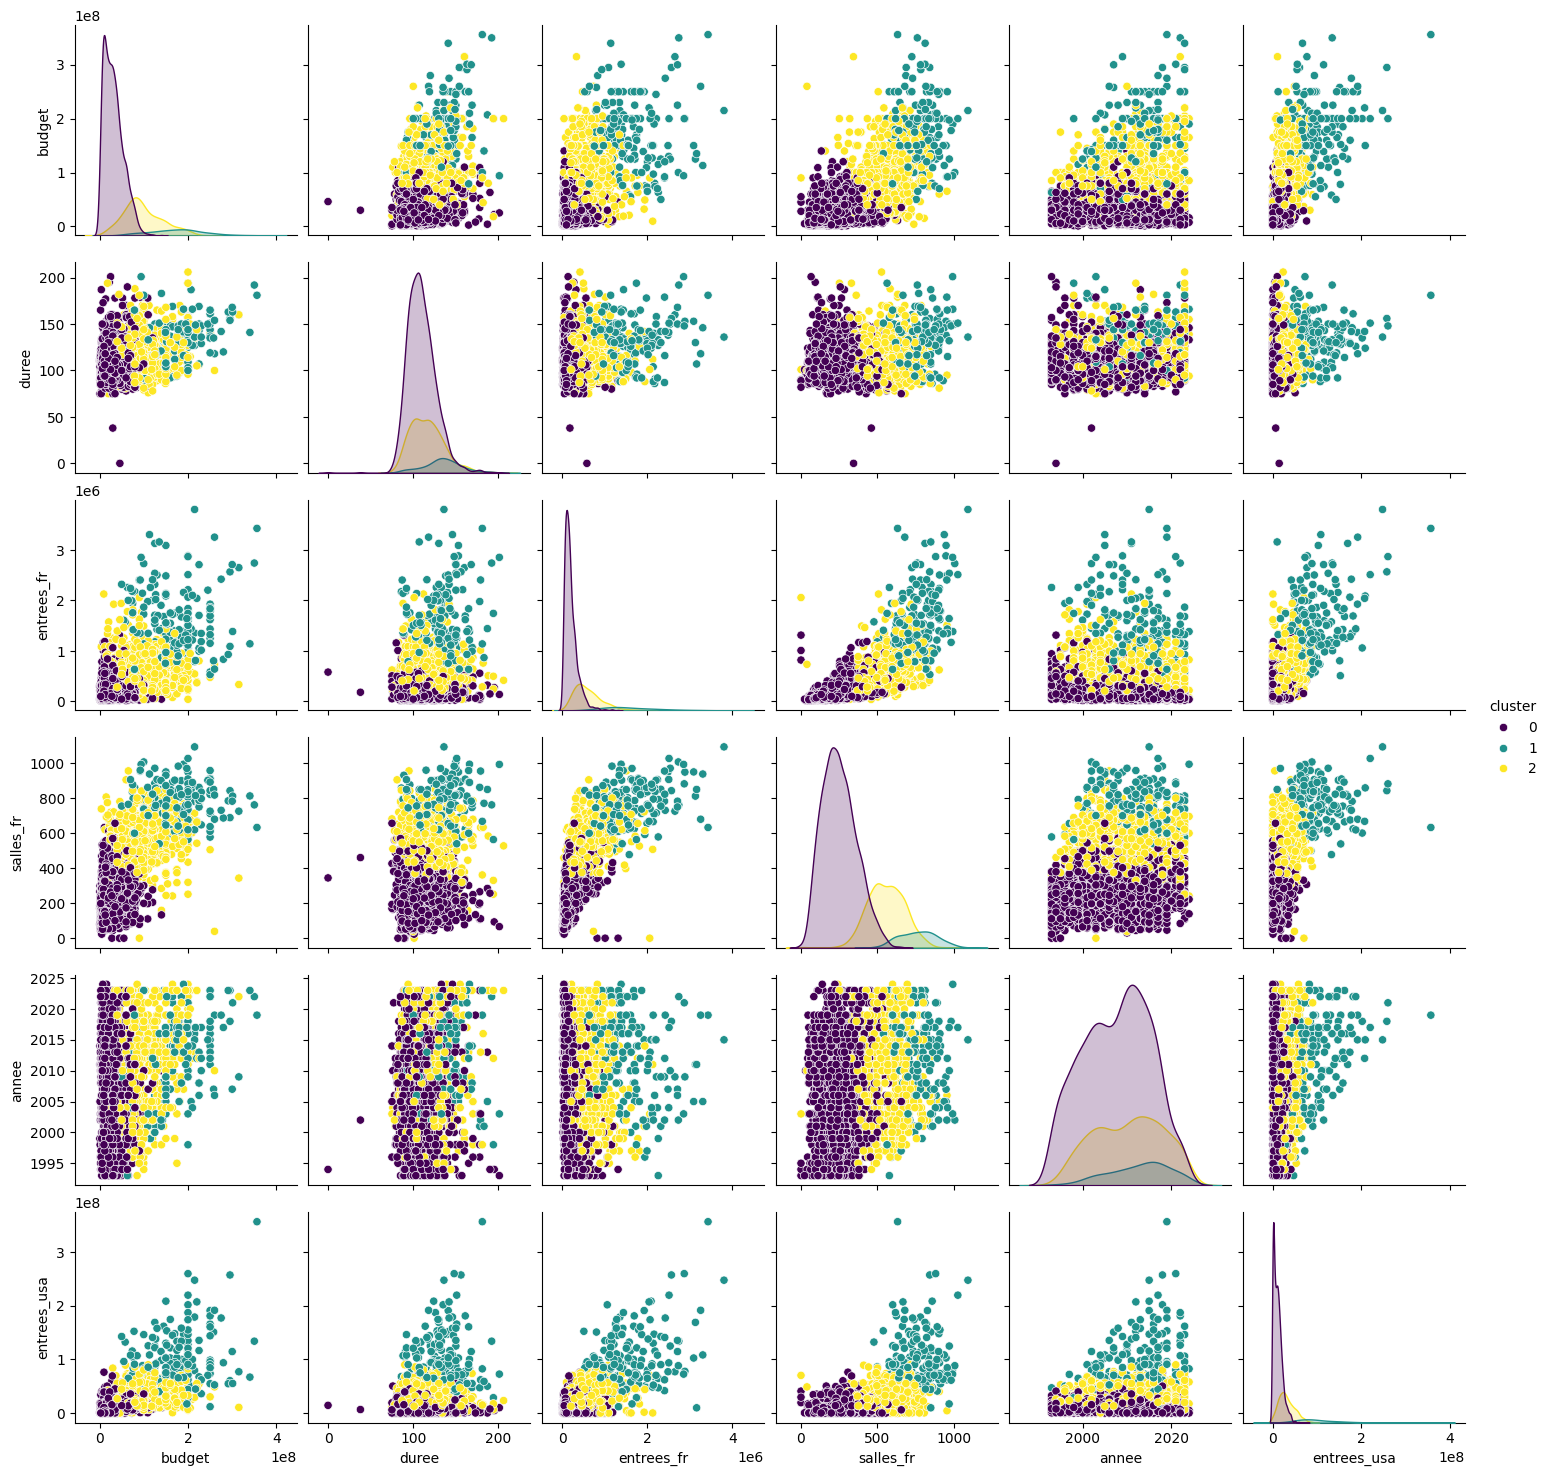

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sélectionner les caractéristiques que vous souhaitez utiliser pour le clustering
features = ['budget', 'duree', 'entrees_fr', 'salles_fr', 'annee', 'entrees_usa']

# Sélectionner les données à utiliser pour le clustering (par exemple, les données numériques)
data_for_clustering = data[features].dropna()  # Supprimer les lignes avec des valeurs manquantes si nécessaire

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Déterminer le nombre optimal de clusters en utilisant la méthode du coude
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude pour trouver le nombre optimal de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

# Choix du nombre optimal de clusters (par exemple, 3 clusters)
n_clusters = 3

# Appliquer l'algorithme K-Means pour le clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Ajouter les étiquettes de cluster à votre ensemble de données
data_for_clustering['cluster'] = kmeans.labels_

# Afficher les statistiques des clusters
cluster_stats = data_for_clustering.groupby('cluster').describe()
print(cluster_stats)

# Vous pouvez également visualiser les clusters en fonction de certaines caractéristiques
sns.pairplot(data_for_clustering, hue='cluster', palette='viridis')
plt.show()


In [32]:
display(data)

,titre,budget,duree,entrees_fr,franchise,genres,pegi_fr,pegi_usa,entrees_usa,salles_fr,studio,estimation,is_compositeur,annee,origine,budget_millions
0,l'age de glace 3 - le temps des dinosaures,90000000,87,2403734,1,animation,Tous publics,PG,41690382.0,783,20th century fox,None,0,2009,etats-unis,90.00000
1,l'ile de nim,37000000,95,243392,0,film familial,Tous publics,PG,13210579.0,399,snd,None,0,2008,etats-unis,37.00000
2,twilight - chapitre 1 : fascination,37000000,120,755835,1,fantasy,Tous publics,PG,69637740.0,455,snd,None,0,2009,etats-unis,37.00000
3,#jesuislà,11378260,98,112363,0,comédie,Tous publics,NaN,NaN,387,gaumont,None,0,2020,france,11.37826
4,#pire soirée,20000000,101,66666,0,comédie,Tous publics,R,8004283.0,145,sony pictures,None,0,2017,etats-unis,20.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,à couteaux tirés (2019),40000000,131,283889,0,thriller,Tous publics,PG,26769548.0,434,metropolitan,None,0,2019,etats-unis,40.00000
3272,à fond,13750770,91,386345,0,comédie,Tous publics,NaN,NaN,474,wild bunch,None,0,2016,france,13.75077
3273,à la poursuite de demain,190000000,130,418815,0,science fiction,Tous publics,PG,33028165.0,551,walt disney pictures,None,0,2015,etats-unis,190.00000
3274,à plein temps,2700000,85,100254,0,thriller,Tous publics,NaN,2423.0,199,haut et court,None,0,2022,france,2.70000
